# Image classification with TensorFlow

## Sequential Class

We use the `tf.keras.Sequential` class to build neural network models in the TensorFlow library. It lets us create a model as a linear stack of layers, where each layer does a specific operation on the input data and passes the output to the next layer. This way, we can define and implement a neural network model in a step-by-step manner, without worrying about the complex details of how the layers are connected and how the data flows through them. The `tf.keras.Sequential` class is especially suited for creating feedforward neural networks, which are the most common type of neural networks, where the data moves in one direction from the input layer to the output layer. By using the `tf.keras.Sequential` class, we can benefit from the simplicity, modularity, and ease of use of the TensorFlow framework {cite:p}`james2019deep, ansari2023building`.

The main feature of the `tf.keras.Sequential` class is its ability to manage and execute a sequence of neural network layers. When we create an instance of the `tf.keras.Sequential` class, we get an empty model that we can populate with layers using the `add` method. Each layer that we add becomes a part of the model, and the order of the layers determines the order of the data processing. For example, if we add a dense layer followed by an activation layer, the model will first apply a linear transformation to the input data and then apply a non-linear activation function {cite:p}`TensorFlowDocumentation`.

The configuration of each layer defines the architecture of the model, such as the number of units, activation functions, and input shapes. The `tf.keras.Sequential` class takes care of the compatibility between the layers, ensuring that the output shape of each layer matches the input shape of the next layer. This way, we don't have to specify the input shape of each layer, except for the first one {cite:p}`TensorFlowDocumentation`.

After we define the model, we can compile and train it using appropriate optimizers, loss functions, and metrics. During training, the model learns the optimal values of the parameters that minimize the loss function, improving the performance of the model on the given task. In summary, the `tf.keras.Sequential` class offers a simple and intuitive way to create, configure, and train sequential neural network models in the TensorFlow framework {cite:p}`TensorFlowDocumentation`.

## Dataset

The [Fire Dataset](https://www.kaggle.com/datasets/phylake1337/fire-dataset) was curated for the purpose of training a machine learning model to differentiate between two categories of images: those depicting fire (referred to as "fire images") and those representing ordinary scenes (termed "non-fire images"). Consequently, the underlying problem is framed as a binary classification task.

The dataset is organized into two distinct folders. The first one, labeled as the "fire_images" folder, comprises 755 images predominantly featuring outdoor fire occurrences. Notably, some of these fire images exhibit substantial smoke. The second one, named "non-fire_images," encompasses 244 images capturing various aspects of nature, such as forests, trees, grass, rivers, people, foggy forests, lakes, animals, roads, and waterfalls.

The dataset exhibits class imbalance, which means that the two categories, fire and non-fire, do not possess an equal number of samples. To mitigate potential bias during model training and evaluation, it is advisable to construct a validation set in which an equivalent number of images is drawn from both the fire and non-fire classes. One way to achieve this balance is to include 40 images from each class in the validation set, which would also ensure a fair performance assessment.

<!-- from google.colab import drive
drive.mount('/content/drive') 
# dataset_path = '/content/drive/MyDrive/fire_dataset'
-->

In [1]:
import os
import numpy as np

class DatasetLabeler:
    def __init__(self, dataset_path, extension='.png'):
        """
        Initializes the DatasetLabeler object.

        Parameters:
        - dataset_path (str): The path to the dataset.
        - extension (str): The file extension to filter files in the dataset (default is '.png').
        """
        self.dataset_path = dataset_path
        self.extension = extension
        self.files_dict = self._generate_files_dict()
        self.subdirectories = list(self.files_dict.keys())
        self.labels_dict = self._generate_labels_dict()
        self.num2label_dict = self._generate_num2label_dict()

    def _generate_files_dict(self):
        """
        Generates a dictionary representing the directory structure and associated files in the dataset.

        Returns:
        - dict: A dictionary with subdirectory names as keys and lists of associated files as values.
        """
        out = {}
        sep = ' ' * 3
        title = os.path.basename(self.dataset_path)

        print('=' * (len(title) + 1))
        print(title + ':')
        print('=' * (len(title) + 1))

        for entry in os.listdir(self.dataset_path):
            entry_path = os.path.join(self.dataset_path, entry)
            if os.path.isdir(entry_path):
                print('└──', entry + ':')

                sub = os.path.join(self.dataset_path, entry)
                file_list = [x for x in os.listdir(sub) if x.endswith(self.extension)]
                out[entry] = file_list

                print(2 * sep, f'{len(file_list)} {file_list[0].split(".")[-1].upper()} files:')
                print(2 * sep, ', '.join(file_list[:5]) + ', ...')

        return out

    def _generate_labels_dict(self):
        """
        Generates a dictionary mapping modified subdirectory names to original names.

        Returns:
        - dict: A dictionary with modified subdirectory names as keys and original names as values.
        """
        return dict(zip(self.subdirectories, [x.replace('_images','')\
                                              .replace('_',' ').title()\
                                              .replace('Non ','Non-') for x in self.subdirectories]))

    def _generate_num2label_dict(self):
        """
        Generates a dictionary mapping numerical labels to modified subdirectory names.

        Returns:
        - dict: A dictionary with numerical labels as keys and modified subdirectory names as values.
        """
        n = len(self.labels_dict.values())
        return dict(zip(np.arange(n), self.labels_dict.values()))

# Example usage:
dataset_path = 'fire_dataset'
labeler = DatasetLabeler(dataset_path)

# Create a dictionary mapping modified subdirectory names to original names
labels_dict = labeler.labels_dict

# Create a dictionary mapping numerical labels to modified subdirectory names
num2label_dict = labeler.num2label_dict

fire_dataset:
└── fire_images:
       755 PNG files:
       fire.1.png, fire.10.png, fire.100.png, fire.101.png, fire.102.png, ...
└── non_fire_images:
       244 PNG files:
       non_fire.1.png, non_fire.10.png, non_fire.100.png, non_fire.101.png, non_fire.102.png, ...


Observe that there is a significant class imbalance in the dataset, with 755 images belonging to the Fire Class and only 244 images in the Non-Fire class. It is crucial for us to maintain the original distribution of these classes among the training, validation, and test datasets."

Now, let's explain why preserving the original distribution of classes is important for TensorFlow image classification:

Maintaining the original class distribution is important in TensorFlow image classification for the following reasons:

1. **Bias Mitigation**: If we don't preserve the original class distribution, there's a risk of introducing bias into the training process. An imbalanced distribution might lead the model to perform poorly on the minority class (Non-Fire class in this case), as it has fewer examples to learn from. Preserving the distribution helps mitigate this bias.

2. **Real-world Generalization**: In real-world scenarios, the class distribution may not be balanced. Preserving the original distribution ensures that the model learns to classify images based on their real-world prevalence. This is crucial for the model to generalize well when applied to unseen data.

3. **Evaluation Reliability**: When evaluating the model's performance on the test dataset, preserving class distribution ensures that the results are representative of how the model will perform in practical applications. It allows for a more accurate assessment of the model's ability to handle both major and minor classes.

4. **Avoiding Misleading Metrics**: If class distribution is not preserved, accuracy alone can be a misleading metric. A model may achieve high accuracy by simply predicting the majority class all the time. By preserving distribution, we encourage the model to learn meaningful features for both classes.

Maintaining the original distribution of classes in TensorFlow image classification is essential to ensure fairness, unbiased learning, and accurate evaluation of the model's performance, particularly when dealing with imbalanced datasets like the one described (755 Fire Class images and 244 Non-Fire class images).

In [26]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

# Define the batch size for loading data
batch_size = 128
random_seed = 0

# Define the image dimensions
Img_Height = 180
Img_Width = 180

# Define the path to the dataset folder
dataset_path = 'fire_dataset'

# Load the dataset using TensorFlow's image_dataset_from_directory
full_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = dataset_path,
    seed = random_seed,
    image_size = (Img_Height, Img_Width),
    batch_size = batch_size,
    validation_split = None,
    subset = None)

# Extract images and labels from the dataset
X = []
y = []
for images, labels in full_ds:
    X.extend(images)
    y.extend(labels)

# Convert the extracted data to numpy arrays
X = np.array(X)
y = np.array(y)

# Use stratified sampling to split the data into training, validation, and test sets while preserving class ratios
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_seed, stratify=y_temp)

# Create TensorFlow datasets from the numpy arrays, batching the data
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

# Display the number of samples in each split
print(f"Number of training samples: {len(X_train)}")
print(f"Number of validation samples: {len(X_val)}")
print(f"Number of test samples: {len(X_test)}")

Found 999 files belonging to 2 classes.
Number of training samples: 799
Number of validation samples: 100
Number of test samples: 100


Training Set Class Distribution (Percentage):
{'Fire': 75.59, 'Non-Fire': 24.41}

Validation Set Class Distribution (Percentage):
{'Fire': 75.0, 'Non-Fire': 25.0}

Test Set Class Distribution (Percentage):
{'Fire': 76.0, 'Non-Fire': 24.0}


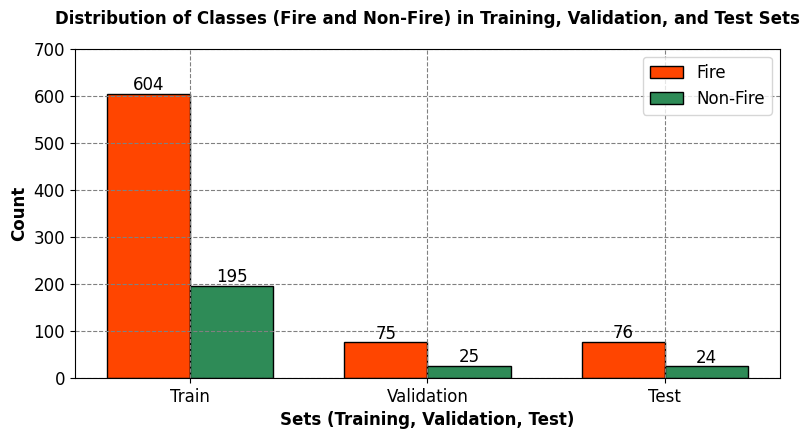

In [27]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('https://raw.githubusercontent.com/HatefDastour/ENGG_680/main/Files/mystyle.mplstyle')

def calculate_class_distribution(y, label_dict):
    """
    Calculate and return the class distribution of a given dataset.

    Parameters:
    - y (numpy array): Target labels of the dataset.
    - label_dict (dict): Mapping of class indices to class labels.

    Returns:
    - class_distribution (dict): Distribution of classes as percentages with labels.
    """
    unique, counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_distribution = dict(zip([label_dict[i] for i in unique], [round(x / total_samples, 4) * 100 for x in counts]))
    return class_distribution

def print_bold(txt, color_code=35):
    """
    Display text in bold with optional color.

    Parameters:
    - txt (str): The text to be displayed.
    - color_code (int): ANSI color code for the text (default is 35 for purple).
    """
    print(f"\033[1;{color_code}m{txt}\033[0m")

# Calculate and display class distribution in each dataset as percentages with labels
print_bold("Training Set Class Distribution (Percentage):")
print(calculate_class_distribution(y_train, num2label_dict))

print_bold("\nValidation Set Class Distribution (Percentage):")
print(calculate_class_distribution(y_val, num2label_dict))

print_bold("\nTest Set Class Distribution (Percentage):")
print(calculate_class_distribution(y_test, num2label_dict))

# Count occurrences of 0s and 1s in each set
train_counts, val_counts, test_counts = np.bincount(y_train), np.bincount(y_val), np.bincount(y_test)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4.5))

# Set up the bar positions and widths
bar_positions = np.arange(3)
bar_width = 0.35

# Create horizontal bars with custom colors
bars1 = ax.bar(bar_positions - bar_width / 2, [train_counts[0], val_counts[0],
                                               test_counts[0]], bar_width, color='OrangeRed', label='Fire', edgecolor='black')
bars2 = ax.bar(bar_positions + bar_width / 2, [train_counts[1], val_counts[1],
                                               test_counts[1]], bar_width, color='SeaGreen', label='Non-Fire', edgecolor='black')

# Set plot labels and title
ax.set_title('Distribution of Classes (Fire and Non-Fire) in Training, Validation, and Test Sets',
             weight='bold', fontsize=12, y = 1.05)
ax.set_xlabel('Sets (Training, Validation, Test)', weight='bold')
ax.set_ylabel('Count', weight='bold')
ax.set_ylim([0, 700])  # Adjust the y-axis limit as needed

# Set x-axis ticks and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(['Train', 'Validation', 'Test'])

# Show the legend
ax.legend(fontsize = 12)

for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f"{round(yval)}",
                ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()

The following table summarizes the data distribution across different sets (training, validation, and test) in our dataset, showing the number of files and samples for each set:

| Dataset Split | Number of Files | Number of Samples |
|---------------|-----------------|-------------------|
| Training      | 799             | 799               |
| Validation    | 100             | 100               |
| Test          | 100             | 100               |

This information provides an overview of the size of each dataset split, crucial for understanding the amount of data available for training, validating, and testing our model.

The following table shows the class distribution within each dataset split, expressed as a percentage of the total samples in each set:

| Dataset Split | Class 'Fire' | Class 'Non-Fire' |
|---------------|--------------|------------------|
| Training      | 75.59%       | 24.41%           |
| Validation    | 75.00%       | 25.00%           |
| Test          | 76.00%       | 24.00%           |

These percentages indicate the proportion of samples belonging to each class in their respective datasets. It's essential to examine class distributions to ensure a balanced representation of classes, as an imbalanced distribution may impact the model's ability to generalize well, especially for the minority class. In this case, the class distribution appears relatively balanced across the training, validation, and test sets.

<!-- from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

# Count occurrences of 0s and 1s in each set
train_counts, val_counts, test_counts = np.bincount(y_train), np.bincount(y_val), np.bincount(y_test)

# Create a ColumnDataSource for the data
data = dict(
    sets=['Training', 'Validation', 'Test'],
    class_0=[train_counts[0], val_counts[0], test_counts[0]],
    class_1=[train_counts[1], val_counts[1], test_counts[1]]
)

source = ColumnDataSource(data=data)

# Set up the figure
p = figure(x_range=data['sets'], height=350, title='Distribution of Classes (Fire and Non-Fire) in Training, Validation, and Test Sets')

# Create vertical bars with custom colors
bar_width = 0.4
p.vbar(x='sets', top='class_0', width=bar_width, source=source, legend_label=num2label_dict[0], line_color='black', fill_color='OrangeRed')
p.vbar(x='sets', top='class_1', width=bar_width, source=source, legend_label=num2label_dict[1], line_color='black', fill_color='Green')

# Set plot labels and title
p.xaxis.axis_label = 'Sets (Training, Validation, Test)'
p.yaxis.axis_label = 'Count'

# Show the plot in the notebook
output_notebook()
show(p) -->

A sample of train data:

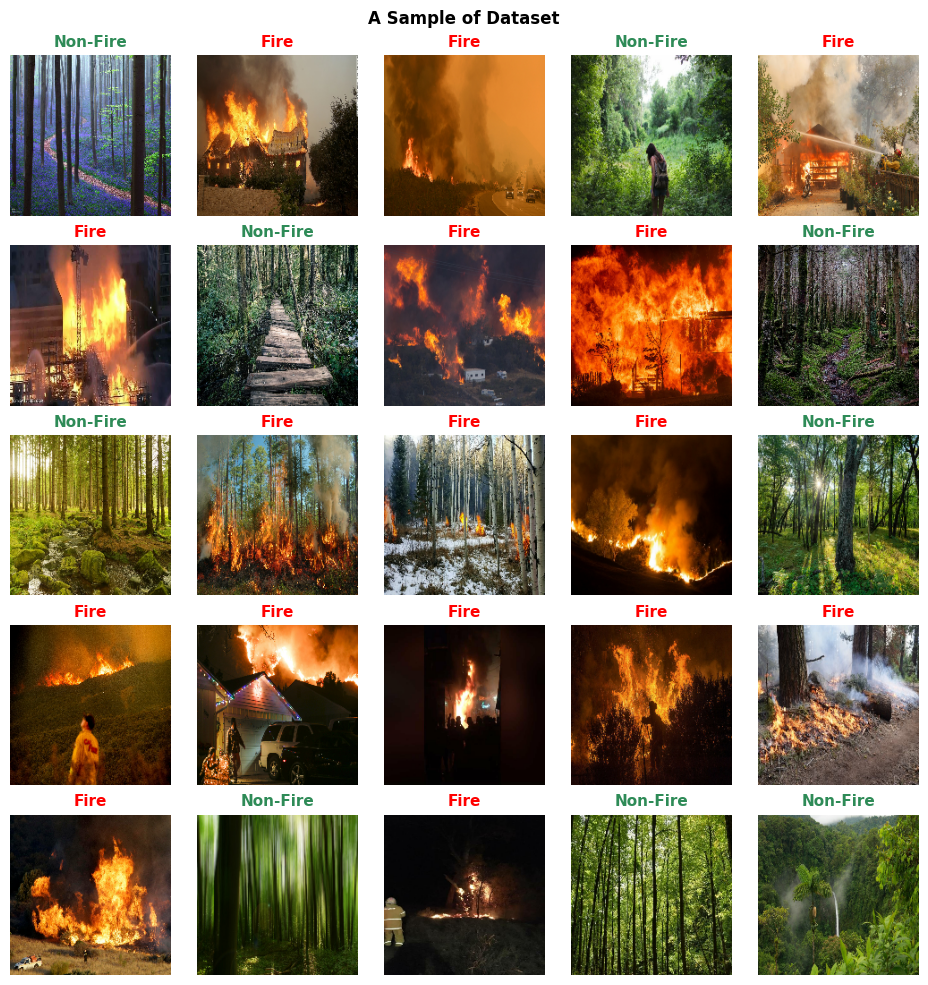

In [28]:
import matplotlib.pyplot as plt

# Create a 5x5 grid of subplots for displaying images
fig, ax = plt.subplots(5, 5, figsize=(9.5, 10))

# Set a title for the entire figure
_ = fig.suptitle('A Sample of Dataset', fontweight='bold', fontsize=12)

# Flatten the 5x5 grid of subplots into a 1D array
ax = ax.ravel()

# Define colors for class labels (0: 'Red', 1: 'SeaGreen')
Colors = dict(zip([0, 1], ['Red', 'SeaGreen']))

# Iterate over the first batch of images and labels from the training dataset
for images, labels in train_ds.take(1):
    for i in range(len(ax)):
        # Display each image in the subplot
        _ = ax[i].imshow(images[i].numpy().astype("uint8"))

        # Set the title for each subplot with the corresponding class label
        _ = ax[i].set_title(num2label_dict[labels[i].numpy()],
                            fontweight='bold', fontsize=11,
                            color=Colors[labels[i].numpy()])

        # Turn off axis labels
        _ = ax[i].axis("off")

        # Set the aspect ratio of each subplot to maintain image proportions
        _ = ax[i].set_aspect(1)

# Adjust the layout of subplots for better visualization
fig.tight_layout()

## Creating a Model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

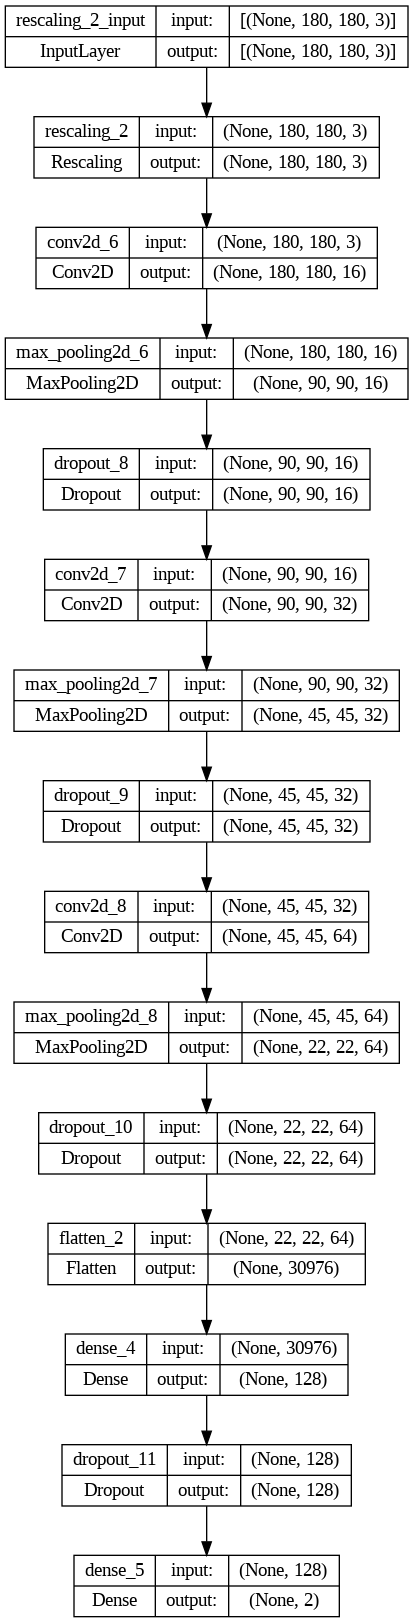

In [29]:
import tensorflow as tf

# Define and compile the model
model = tf.keras.models.Sequential([
    # Rescaling layer: Normalize pixel values to the range [0, 1]
    tf.keras.layers.Rescaling(1./255, input_shape=(Img_Height, Img_Width, 3)),

    # First convolutional layer with 16 filters, each of size 3x3
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    # Max-pooling layer to reduce spatial dimensions
    tf.keras.layers.MaxPooling2D(),

    # Dropout layer to mitigate overfitting
    tf.keras.layers.Dropout(0.25),

    # Second convolutional layer with 32 filters, each of size 3x3
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    # Another max-pooling layer
    tf.keras.layers.MaxPooling2D(),

    # Dropout layer
    tf.keras.layers.Dropout(0.25),

    # Third convolutional layer with 64 filters, each of size 3x3
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    # Another max-pooling layer
    tf.keras.layers.MaxPooling2D(),

    # Dropout layer
    tf.keras.layers.Dropout(0.25),

    # Flatten layer to convert the 2D feature maps into a 1D vector
    tf.keras.layers.Flatten(),

    # Fully connected (dense) layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),

    # Dropout layer
    tf.keras.layers.Dropout(0.5),

    # Output layer with 2 neurons (for binary classification) and no activation function
    tf.keras.layers.Dense(2)
])

# Display a summary of the model architecture
model.summary()

# Plot the model graph with layer shapes and names
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True)

The architecture of this model is a convolutional neural network (CNN) that consists of the following layers:

- A rescaling layer that scales the input images to the range [0, 1] for better numerical stability. This layer has no parameters and does not change the shape of the input.
- A convolutional layer that applies 16 filters of size 3x3 to the input, using a rectified linear unit (ReLU) as the activation function. This layer learns to extract low-level features from the input images, such as edges and corners. The output shape of this layer is (180, 180, 16), where 180 is the height and width of the image, and 16 is the number of filters. This layer has 448 parameters, which are the weights and biases of the filters.
- A max pooling layer that reduces the spatial dimensions of the input by taking the maximum value in each 2x2 window. This layer helps to reduce the computational cost and prevent overfitting by discarding some information. The output shape of this layer is (90, 90, 16), where 90 is the half of the height and width of the input, and 16 is the same as the input. This layer has no parameters and does not change the number of filters.
- A dropout layer that randomly sets some of the input units to zero with a probability of 0.2. This layer helps to prevent overfitting by introducing some noise and regularization to the network. The output shape of this layer is the same as the input shape, (90, 90, 16). This layer has no parameters and does not change the number of filters.
- A convolutional layer that applies 32 filters of size 3x3 to the input, using a ReLU as the activation function. This layer learns to extract mid-level features from the input images, such as shapes and textures. The output shape of this layer is (90, 90, 32), where 90 is the same as the input, and 32 is the number of filters. This layer has 4640 parameters, which are the weights and biases of the filters.
- A max pooling layer that reduces the spatial dimensions of the input by taking the maximum value in each 2x2 window. The output shape of this layer is (45, 45, 32), where 45 is the half of the height and width of the input, and 32 is the same as the input. This layer has no parameters and does not change the number of filters.
- A dropout layer that randomly sets some of the input units to zero with a probability of 0.2. The output shape of this layer is the same as the input shape, (45, 45, 32). This layer has no parameters and does not change the number of filters.
- A convolutional layer that applies 64 filters of size 3x3 to the input, using a ReLU as the activation function. This layer learns to extract high-level features from the input images, such as objects and scenes. The output shape of this layer is (45, 45, 64), where 45 is the same as the input, and 64 is the number of filters. This layer has 18496 parameters, which are the weights and biases of the filters.
- A max pooling layer that reduces the spatial dimensions of the input by taking the maximum value in each 2x2 window. The output shape of this layer is (22, 22, 64), where 22 is the half of the height and width of the input, and 64 is the same as the input. This layer has no parameters and does not change the number of filters.
- A dropout layer that randomly sets some of the input units to zero with a probability of 0.2. The output shape of this layer is the same as the input shape, (22, 22, 64). This layer has no parameters and does not change the number of filters.
- A flatten layer that reshapes the input into a one-dimensional vector of length 30976. This layer prepares the input for the fully connected layers that follow. The output shape of this layer is (30976,). This layer has no parameters and does not change the number of units.
- A dense layer that connects all the input units to 128 output units, using a ReLU as the activation function. This layer learns to combine the features extracted by the convolutional layers into a representation that is suitable for the classification task. The output shape of this layer is (128,). This layer has 3965056 parameters, which are the weights and biases of the units.
- A dropout layer that randomly sets some of the input units to zero with a probability of 0.2. The output shape of this layer is the same as the input shape, (128,). This layer has no parameters and does not change the number of units.
- A dense layer that connects all the input units to 2 output units, using a softmax as the activation function. This layer learns to output the probability of each class for the input image. The output shape of this layer is (2,). This layer has 258 parameters, which are the weights and biases of the units.

The total number of parameters of this model is 3988898, which is the sum of the parameters of all the layers. The total number of trainable parameters is the same as the total number of parameters, which means that all the layers are trainable and can be updated during the training process. The total number of non-trainable parameters is zero, which means that there are no frozen or fixed layers in this model. 

Visualkeras stands as a Python library designed to facilitate the visualization of Keras neural networks, providing insights into the structure and connections within. This library offers the flexibility to tailor visualizations according to specific requirements. It supports two primary types of visualizations: layered and graph. Layered visualizations excel in depicting the spatial dimensions and filters of Convolutional Neural Networks (CNNs), making them particularly suitable for such architectures. On the other hand, graph visualizations prove effective in illustrating the inputs, outputs, and operations of various models, ranging from straightforward feed-forward networks to more complex structures. Visualkeras emerges as a valuable tool in the arsenal of neural network developers, offering enhanced understanding and aiding in the debugging process {cite:p}`Gavrikov2020VisualKeras`.

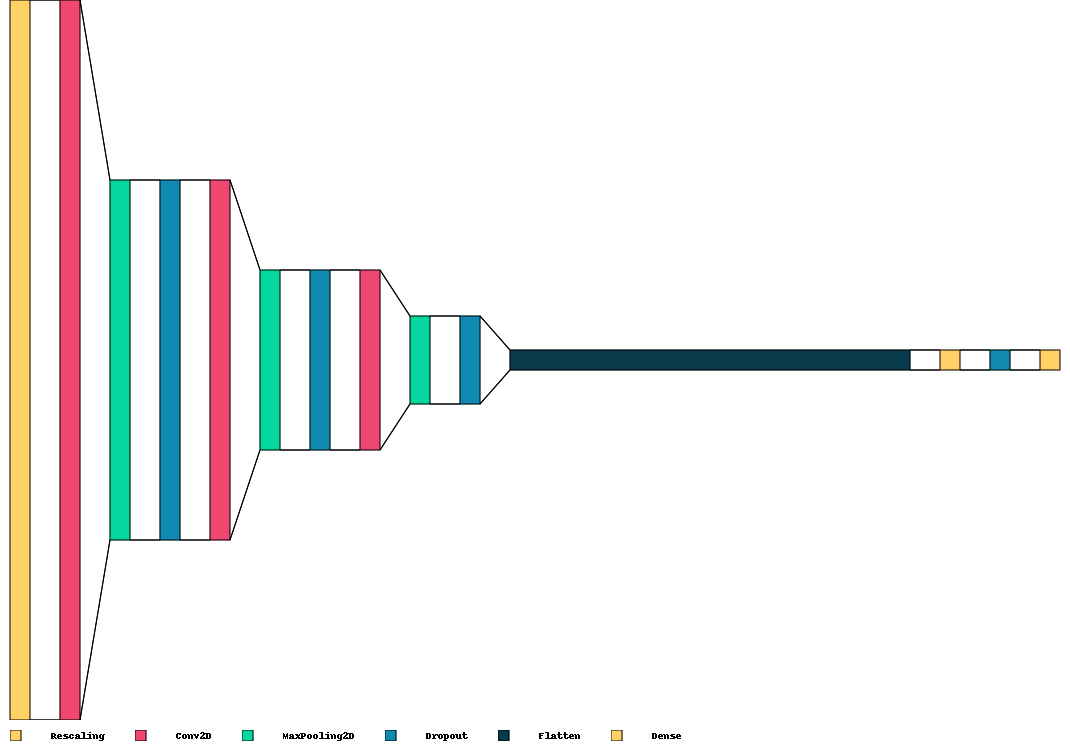

In [30]:
from IPython.display import clear_output
try:
    import visualkeras
except ImportError:
    !pip install visualkeras
    import visualkeras

clear_output()
visualkeras.layered_view(model, legend=True, draw_volume=False, spacing=30)

`````{admonition} Remark
:class: important
The proposed model can be enhanced through further fine-tuning.
`````

## Fitting the model

In [31]:
import tensorflow as tf

# Define a custom callback for verbose logging every 10 iterations
class CustomVerboseCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 10 == 0:
            print(f"Iteration {epoch + 1}: Training - loss: {logs['loss']:.4f}, accuracy: {logs['accuracy']:.4f}, Validation - loss: {logs['val_loss']:.4f}, accuracy: {logs['val_accuracy']:.4f}")

# Compile the model
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics= ['accuracy'])

# Train the model using the training and validation datasets with the custom callback
history = model.fit(train_ds, validation_data=val_ds, verbose = 0,
                    epochs= 80, callbacks=[CustomVerboseCallback()] )

Iteration 10: Training - loss: 0.9449, accuracy: 0.9599, Validation - loss: 0.8862, accuracy: 0.9500
Iteration 20: Training - loss: 0.5505, accuracy: 0.9675, Validation - loss: 0.5350, accuracy: 0.9500
Iteration 30: Training - loss: 0.4001, accuracy: 0.9687, Validation - loss: 0.3903, accuracy: 0.9600
Iteration 40: Training - loss: 0.3405, accuracy: 0.9712, Validation - loss: 0.3282, accuracy: 0.9800
Iteration 50: Training - loss: 0.2781, accuracy: 0.9762, Validation - loss: 0.2664, accuracy: 0.9800
Iteration 60: Training - loss: 0.2457, accuracy: 0.9775, Validation - loss: 0.2271, accuracy: 0.9900
Iteration 70: Training - loss: 0.2294, accuracy: 0.9787, Validation - loss: 0.2469, accuracy: 0.9600
Iteration 80: Training - loss: 0.1992, accuracy: 0.9787, Validation - loss: 0.1884, accuracy: 0.9900


The results show the performance of a model that is trained and validated on some datasets. The model was evaluated by two metrics: loss and accuracy. Loss measures how well the model fits the data, and accuracy measures how often the model makes correct predictions. A lower loss and a higher accuracy indicate a better model.

The results can be interpreted as follows:

- The model is trained and validated for 80 iterations, which means it updates its parameters 80 times based on the data and the feedback.
- The model improves its performance on both the training and validation sets over the iterations, which means it learns from the data and adapts to the feedback. The loss decreases and the accuracy increases for both sets as the iterations increase.
- The model achieves the best performance on the validation set at iteration 60, which has the lowest loss of **0.2271** and the highest accuracy of **0.99**. This means the model can correctly classify 99% of the validation data and has a very low error rate.
- The model has a slight drop in performance on the validation set at iteration 70, which has a higher loss of **0.2469** and a lower accuracy of **0.96**. This means the model may have some overfitting or variance issues, which means it performs well on the training data but not on the unseen data.
- The model recovers its performance on the validation set at iteration 80, which has a lower loss of **0.1884** and a higher accuracy of **0.99**. This means the model may have some regularization or optimization techniques, which means it reduces the overfitting or variance issues and improves the generalization ability.

Overall, the results suggest that the model is very effective and accurate, and it does not have significant underfitting or bias issues. The model may have some overfitting or variance issues, but they are not severe and can be mitigated by some techniques. The model performs consistently well on the validation set, which indicates its reliability and robustness.

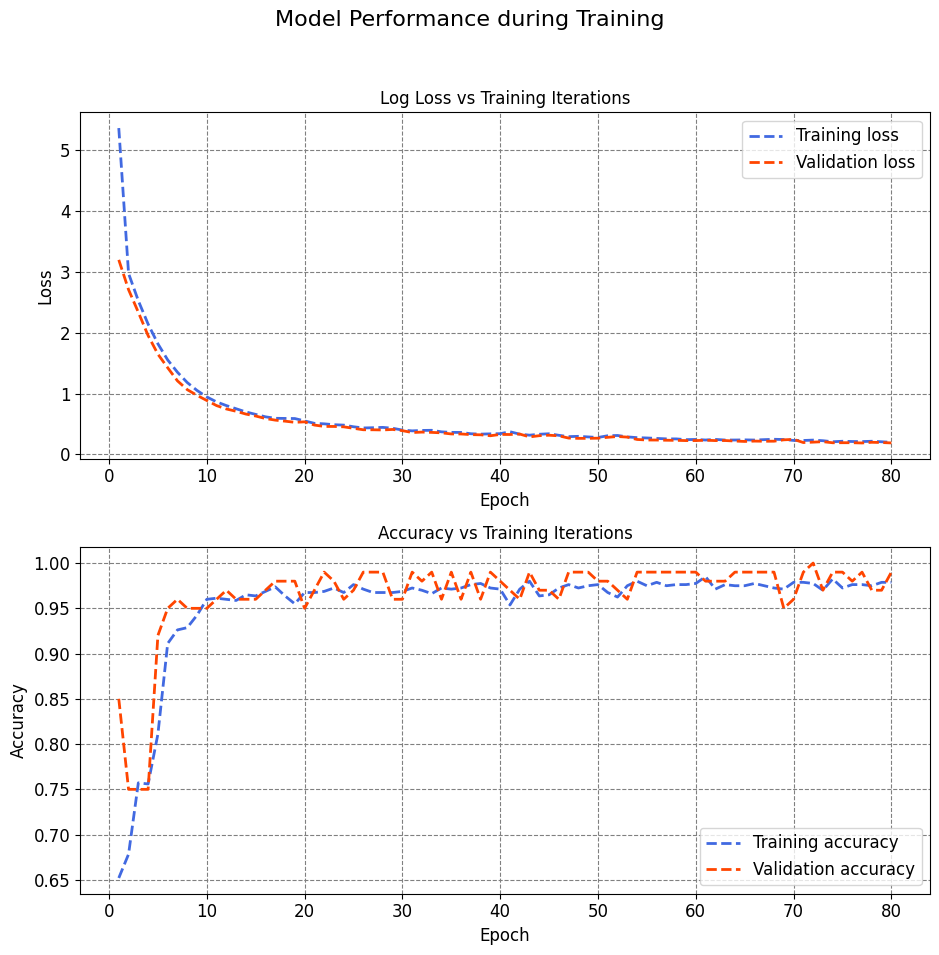

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9.5, 10))

# Define style colors
style_colors = ['RoyalBlue', 'OrangeRed']

# Plot labels and titles
plot_labels = ['Loss', 'Accuracy']
plot_titles = ['Log Loss vs Training Iterations', 'Accuracy vs Training Iterations']

# Loop through plots
for i, (label, title) in enumerate(zip(plot_labels, plot_titles)):
    # Plot training and testing metrics from the history file
    axes[i].plot(range(1, len(history.history['loss']) + 1), history.history['loss'] if label == 'Loss' else history.history['accuracy'],
                 label="Training " + label.lower(), color=style_colors[0], linestyle='dashed', linewidth=2)

    axes[i].plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'] if label == 'Loss' else history.history['val_accuracy'],
                 label="Validation " + label.lower(), color=style_colors[1], linestyle='dashed', linewidth=2)

    axes[i].set_xlabel("Epoch")
    axes[i].set_ylabel(label)
    axes[i].legend(fontsize = 12)
    axes[i].set_title(title)

# Add a common title
fig.suptitle("Model Performance during Training", fontsize=16)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Interpreting loss and accuracy on the validation set in a deep learning model involves understanding the performance of the model during the training process.

1. **Loss:**
   - **Definition:** The loss is a measure of how well the model is performing its task. It represents the error between the predicted values and the actual values in the training data.
   - **Interpretation:** Lower loss values indicate better performance. During training, the model aims to minimize this value by adjusting its weights and biases.

2. **Accuracy:**
   - **Definition:** Accuracy is the proportion of correctly classified instances out of the total instances in the validation set. It is a common metric for classification problems.
   - **Interpretation:** Higher accuracy values suggest better performance. However, accuracy alone might not provide a complete picture, especially if the dataset is imbalanced.

Now, considering these metrics in the context of the validation set:

- **Decreasing Loss:** If the loss on the validation set is decreasing over epochs, it indicates that the model is learning and improving its predictive capabilities.

- **Stable or Increasing Accuracy:** An increasing accuracy on the validation set is generally a positive sign, indicating that the model is getting better at classifying data correctly.

- **Overfitting:** However, it's crucial to monitor both loss and accuracy. If the loss continues to decrease while accuracy plateaus or starts to decrease, it might suggest overfitting. Overfitting occurs when the model becomes too specific to the training data and performs poorly on new, unseen data.

- **Early Stopping:** If loss on the validation set starts to increase after a certain number of epochs, it could be an indication to stop training early to prevent overfitting.

A good model is one that minimizes loss and maximizes accuracy on the validation set. Monitoring these metrics during training helps in making informed decisions about the model's performance and generalization to new data.

In [33]:
import numpy as np
import pandas as pd

# Define Metric Names (mapping from metric keys to more descriptive names)
Metrics_Names = {'loss': 'Loss', 'accuracy': 'Accuracy', 'mae': 'MAE', 'mse': 'MSE', 'recall': 'Recall'}

# Filter and modify history keys
Validation_Table = [key for key in history.history.keys() if 'val_' in key]
Train_Table = [key for key in history.history.keys() if key not in Validation_Table]

# Create DataFrames for validation and training metrics
Validation_Table = pd.DataFrame({key.replace('val_', ''): history.history[key] for key in Validation_Table})
Train_Table = pd.DataFrame({key: history.history[key] for key in Train_Table})

# Rename columns and add Iteration column
def modify_table(df):
    df = df.rename(columns=Metrics_Names)
    df['Iteration'] = np.arange(df.shape[0])
    return df[['Iteration'] + sorted(df.columns[:-1])]

Validation_Table = modify_table(Validation_Table)
Train_Table = modify_table(Train_Table)

# Evaluate and format scores for train, validation, and test datasets
def evaluate_and_format(model, dataset, batch_size):
    scores = model.evaluate(dataset, batch_size=batch_size, verbose=0)
    scores_df = pd.DataFrame([scores], columns=model.metrics_names)
    return scores_df

# Calculate and format scores for the train, validation, and test datasets
score_train = evaluate_and_format(model, train_ds, batch_size)
score_val = evaluate_and_format(model, val_ds, batch_size)
score_test = evaluate_and_format(model, test_ds, batch_size)

# Concatenate and display scores in a table
score = pd.concat([score_train, score_val, score_test], axis=0, ignore_index=True)
score.index = ['Train', 'Validation', 'Test']
score.rename(columns=Metrics_Names, inplace=True)

# Display the score table
display(score.style.format({'Loss': '{:.4e}', 'Accuracy': '{:.4e}'}))

,Loss,Accuracy
Train,1.9113e-01,9.8498e-01
Validation,1.8837e-01,9.9000e-01
Test,2.5875e-01,9.7000e-01


The results show the performance of a machine learning model on three different datasets: train, validation, and test. The model is evaluated by two metrics: loss and accuracy. Loss measures how well the model fits the data, and accuracy measures how often the model makes correct predictions. A lower loss and a higher accuracy indicate a better model.

The results can be interpreted as follows:

- The model has a very high accuracy on all three datasets, which means it can correctly predict most of the labels. The highest accuracy is on the validation set, which is **99%**.
- The model has a low loss on all three datasets, which means it fits the data well. The lowest loss is on the validation set, which is **0.1884**.
- The model performs slightly worse on the test set than on the train and validation sets, which means it may have some overfitting or generalization issues. The test set has the highest loss, which is **0.2588**, and the lowest accuracy, which is **97%**.

Overall, the results suggest that the model is very effective and accurate, but it may need some improvement to reduce the gap between the test set and the other sets.

In [34]:
from IPython.display import clear_output

# Function to create and display a confusion matrix using seaborn heatmap
def create_confusion_matrix(model, dataset):
    y_true = []
    y_pred = []

    # Generate predictions
    for images, labels in dataset:
        y_true.extend(labels.numpy())
        y_pred.extend(model.predict(images).argmax(axis=1))

    # Calculate the confusion matrix
    confusion = tf.math.confusion_matrix(y_true, y_pred)

    return confusion

# Create confusion matrices for Train, Validation, and Test sets
CM_train = create_confusion_matrix(model, train_ds)
CM_val = create_confusion_matrix(model, val_ds)
CM_test = create_confusion_matrix(model, test_ds)
clear_output()

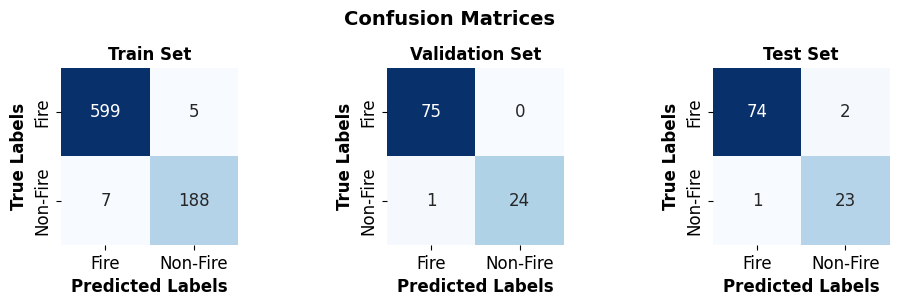

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(ax, confusion_matrix, dataset_name, num2label_dict = num2label_dict):
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
                xticklabels=num2label_dict.values(), yticklabels= num2label_dict.values(), ax=ax,
                annot_kws={"fontsize": 12})
    ax.set(title=dataset_name, xlabel='Predicted Labels', ylabel='True Labels')
    for label in [ax.title, ax.xaxis.label, ax.yaxis.label]:
        label.set_fontweight('bold')
    ax.grid(False)

fig, axes = plt.subplots(1, 3, figsize=(9.5, 3))
fig.suptitle('Confusion Matrices', fontsize=14, weight='bold')

# Assuming you have CM_train, CM_val, and CM_test defined
for ax, confusion_matrix, title in zip(axes, [CM_train, CM_val, CM_test], ['Train Set', 'Validation Set', 'Test Set']):
    plot_confusion_matrix(ax, confusion_matrix, title)

plt.tight_layout()
plt.subplots_adjust(wspace= .5)

The results show the performance of a machine learning model that classifies images into two categories: fire and non-fire. The model is evaluated by a confusion matrix, which shows the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for each category. A higher TP and TN and a lower FP and FN indicate a better model.

The results can be interpreted as follows:

- The model has three confusion matrices, one for each dataset: train, validation, and test. The datasets are split into fire and non-fire images, and the labels are encoded as {0: 'Fire', 1: 'Non-Fire'}.
- The model has a very high accuracy on all three datasets, which means it can correctly classify most of the images. The accuracy is calculated as (TP + TN) / (TP + FP + TN + FN).
    - The train set accuracy is (599 + 188) / (599 + 5 + 7 + 188) = **0.9875**.
    - The validation set accuracy is (75 + 24) / (75 + 0 + 1 + 24) = **0.99**.
    - The test set accuracy is (74 + 23) / (74 + 2 + 1 + 23) = **0.97**.
- The model has a very high precision on all three datasets, which means it can minimize the false positives. The precision is calculated as TP / (TP + FP).
    - The fire precision is 599 / (599 + 5) = **0.9917** for the train set, 75 / (75 + 0) = **1** for the validation set, and 74 / (74 + 2) = **0.9737** for the test set.
    - The non-fire precision is 188 / (188 + 7) = **0.9641** for the train set, 24 / (24 + 1) = **0.96** for the validation set, and 23 / (23 + 1) = **0.9583** for the test set.
- The model has a very high recall on all three datasets, which means it can minimize the false negatives. The recall is calculated as TP / (TP + FN).
    - The fire recall is 599 / (599 + 7) = **0.9884** for the train set, 75 / (75 + 1) = **0.9868** for the validation set, and 74 / (74 + 1) = **0.9867** for the test set.
    - The non-fire recall is 188 / (188 + 5) = **0.974** for the train set, 24 / (24 + 0) = **1** for the validation set, and 23 / (23 + 2) = **0.92** for the test set.

Overall, the results suggest that the model is very effective and accurate in classifying fire and non-fire images, and it does not have significant overfitting or underfitting issues. The model performs slightly better on the validation set than on the train and test sets, which may be due to the size or quality of the datasets.


The F1-score is calculated as 2 * (precision * recall) / (precision + recall):

| Dataset     | Accuracy | Precision (Fire) | Recall (Fire) | F1-score (Fire) | Precision (Non-Fire) | Recall (Non-Fire) | F1-score (Non-Fire) |
|-------------|----------|------------------|---------------|-----------------|----------------------|-------------------|---------------------|
| Train       | 0.9875   | 0.9917           | 0.9884        | 0.9901          | 0.9641               | 0.974             | 0.969               |
| Validation  | 0.99     | 1                | 0.9868        | 0.9934          | 0.96                 | 1                 | 0.9796              |
| Test        | 0.97     | 0.9737           | 0.9867        | 0.9802          | 0.9583               | 0.92              | 0.939               |
